# Problemas de regresión
Francisco Javier Sánchez Panduro
A01639832

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('./crime_data.csv')
df.head()

,State,VR,MR,M,W,H,P,S
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5


In [27]:
df.isna().any(axis=1).sum()

0

Variable dependiente VR
Variables independientes M W S P

## Graficar variables dependientes vs variables independientes

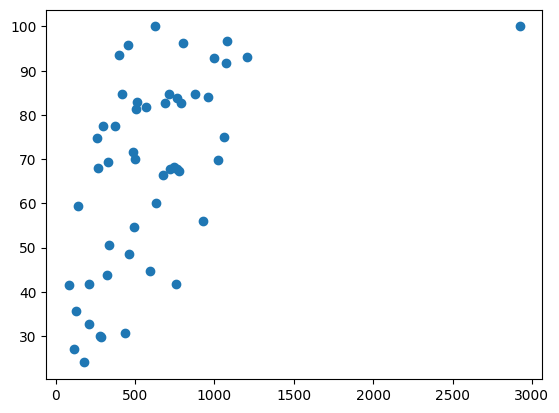

In [8]:
plt.scatter(df['VR'], df['M'])

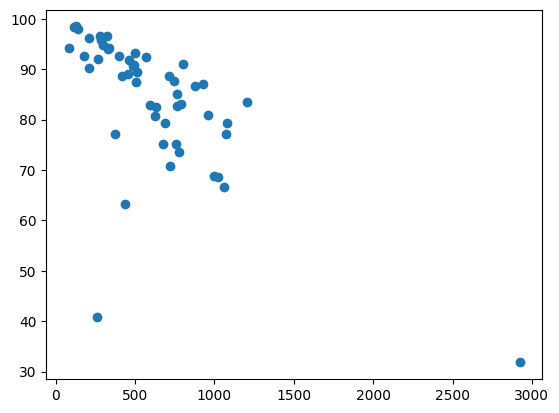

In [9]:
plt.scatter(df['VR'], df['W'])

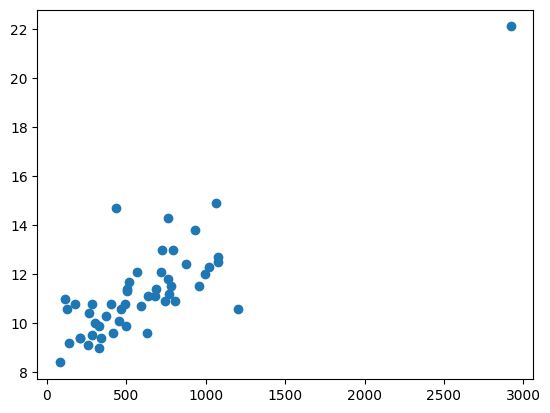

In [10]:
plt.scatter(df['VR'], df['S'])

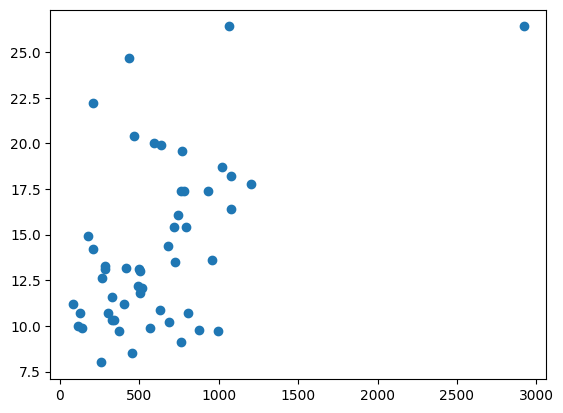

In [11]:
plt.scatter(df['VR'], df['P'])

## Implementar formula directa para calcular los coeficientes de un modelo de regresión lineal

In [19]:
x = np.column_stack([np.ones(len(df)), df['M'], df['W'], df['S'], df['P']])
y = df['VR'].values

beta = np.linalg.inv(x.T @ x) @ x.T @ y
print(beta)

[-1191.97437358     7.40434509    -3.50723304   120.35842821
    16.67071979]


In [15]:
print(f'Formula: {beta[0]} + {beta[1]} M + {beta[2]} W + {beta[3]} S + {beta[4]} P')

Formula: -1191.97437357824 + 7.404345085770844 M + -3.50723304247519 W + 120.35842821187339 S + 16.67071978509876 P


## Evalua con validación cruzada de k-plieges tu modelo calculando R2, MSE y MAE

In [22]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)

mse_cv = []
mae_cv = []
r2_cv = []

def predict(x, beta):
    return x @ beta

def fit_model(x, y):
    return np.linalg.inv(x.transpose() @ x) @ x.transpose() @ y    

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    beta_cv = fit_model(x_train, y_train)
    
    y_pred = predict(x_test, beta_cv)

    mse_i = mean_squared_error(y_test, y_pred)
    mae_i = mean_absolute_error(y_test, y_pred)
    r2_i = r2_score(y_test, y_pred)
    
    mse_cv.append(mse_i)
    mae_cv.append(mae_i)
    r2_cv.append(r2_i)

print(f'MSE promedio: {np.mean(mse_cv)}')
print(f'MAE promedio: {np.mean(mae_cv)}')
print(f'R^2 promedio: {np.mean(r2_cv)}')

MSE promedio: 47206.85143352217
MAE promedio: 157.12592827075463
R^2 promedio: 0.5228131043236599


## Metodo de validación cruzada con Monte Carlo

In [25]:
mse_mc = []
mae_mc = []
r2_mc = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    x_train = np.column_stack([np.ones(x_train.shape[0]), x_train])
    x_test = np.column_stack([np.ones(x_test.shape[0]), x_test])
    
    beta_mc = fit_model(x_train, y_train)
    
    y_pred = predict(x_test, beta_mc)
    
    mse_i = mean_squared_error(y_test, y_pred)
    mae_i = mean_absolute_error(y_test, y_pred)
    r2_i = r2_score(y_test, y_pred)
    
    mse_mc.append(mse_i)
    mae_mc.append(mae_i)
    r2_mc.append(r2_i)

LinAlgError: Singular matrix